IMPORTING SOME LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV



Load the Dataset


In [ ]:
#import pandas as pd
df=pd.read_csv('/content/train.csv')


In [ ]:
df.shape

(42000, 785)

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
df.duplicated().sum()

0

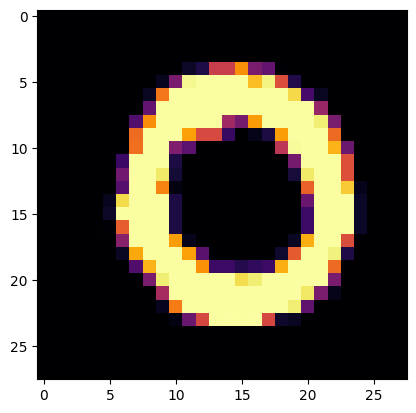

In [ ]:

image_pixels = df.iloc[1, :-1].values

# Reshape the pixel values into a 28x28 array
sample = np.reshape(image_pixels, (28, 28))

plt.imshow(sample, cmap='inferno')

Separate features and target coloms

In [ ]:
x = df.drop('label',axis=1)
y = df['label']

In [ ]:
x.shape,y.shape

((42000, 784), (42000,))

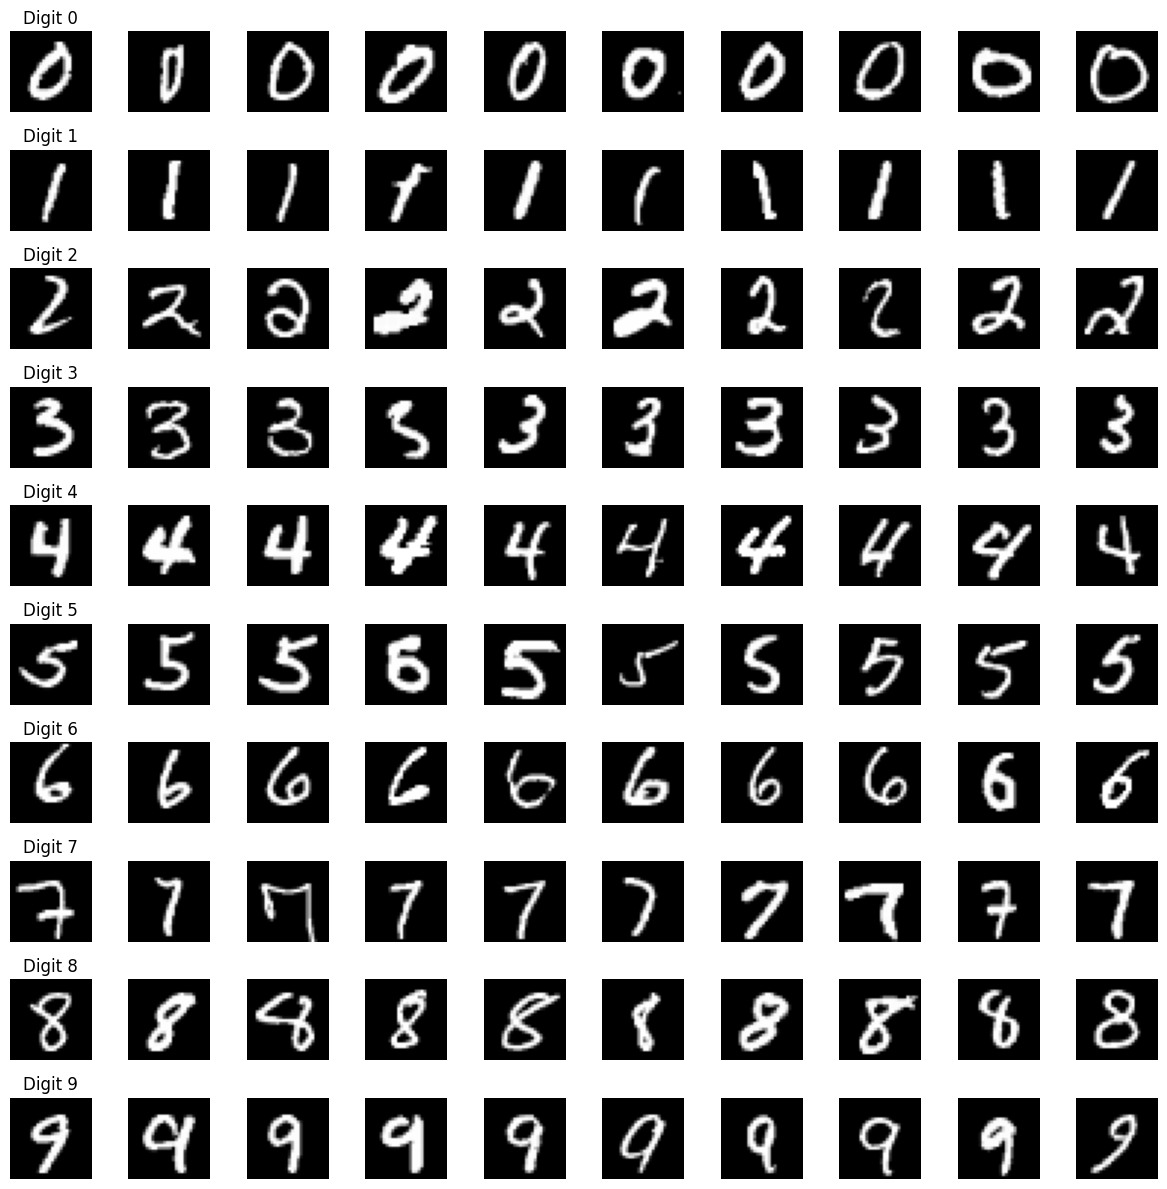

In [ ]:


# Set the number of images per digit to display
n = 10

# Create a larger figure for displaying the grid of images
plt.figure(figsize=(12, 12))

# Iterate over each digit (0-9)
for digit in range(10):
    # Get indices of images corresponding to the current digit
    indices = np.where(y == digit)[0]

    # Check if there are enough images for this digit
    if len(indices) < n:
        continue  # Skip this digit if there are not enough images

    # Randomly select n indices without replacement
    chosen_indices = np.random.choice(indices, n, replace=False)

    # Plot the selected images in a row for the current digit
    for i, idx in enumerate(chosen_indices):
        # Reshape the image and display it
        digit_image = x.iloc[idx].values.reshape(28, 28)  # Reshape to 28x28
        plt.subplot(10, n, digit * n + i + 1)  # Position the subplot
        plt.imshow(digit_image, cmap='gray')  # Display the image
        plt.axis('off')  # Turn off axis labels

        # Set the title for the first image in the row with the digit label
        if i == 0:
            plt.title(f"Digit {digit}")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Split the data into train data and test data



In [ ]:
#from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [ ]:
x.shape,x_train.shape,x_test.shape

((42000, 784), (33600, 784), (8400, 784))

Model Implementation

In [ ]:
##Pre-prunning

parameter = {
             'criterion' : ['gini', 'entropy', 'log_loss'],
             'splitter' : ['best', 'random'],
             'max_depth' : [1,2,3,4,5],
             'max_features' : ['auto','sqrt', 'log2']
}

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier()

cv = GridSearchCV(tree, param_grid=parameter, cv=5, scoring= 'accuracy')
cv.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [ ]:
treemodel= DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 5,
 max_features= 'auto',
 splitter= 'best')

In [ ]:
treemodel= treemodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
y_test_pred = treemodel.predict(x_test)

In [ ]:
x_test.shape

(8400, 784)

Score

In [ ]:
#from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_test_pred)
score

0.5817857142857142

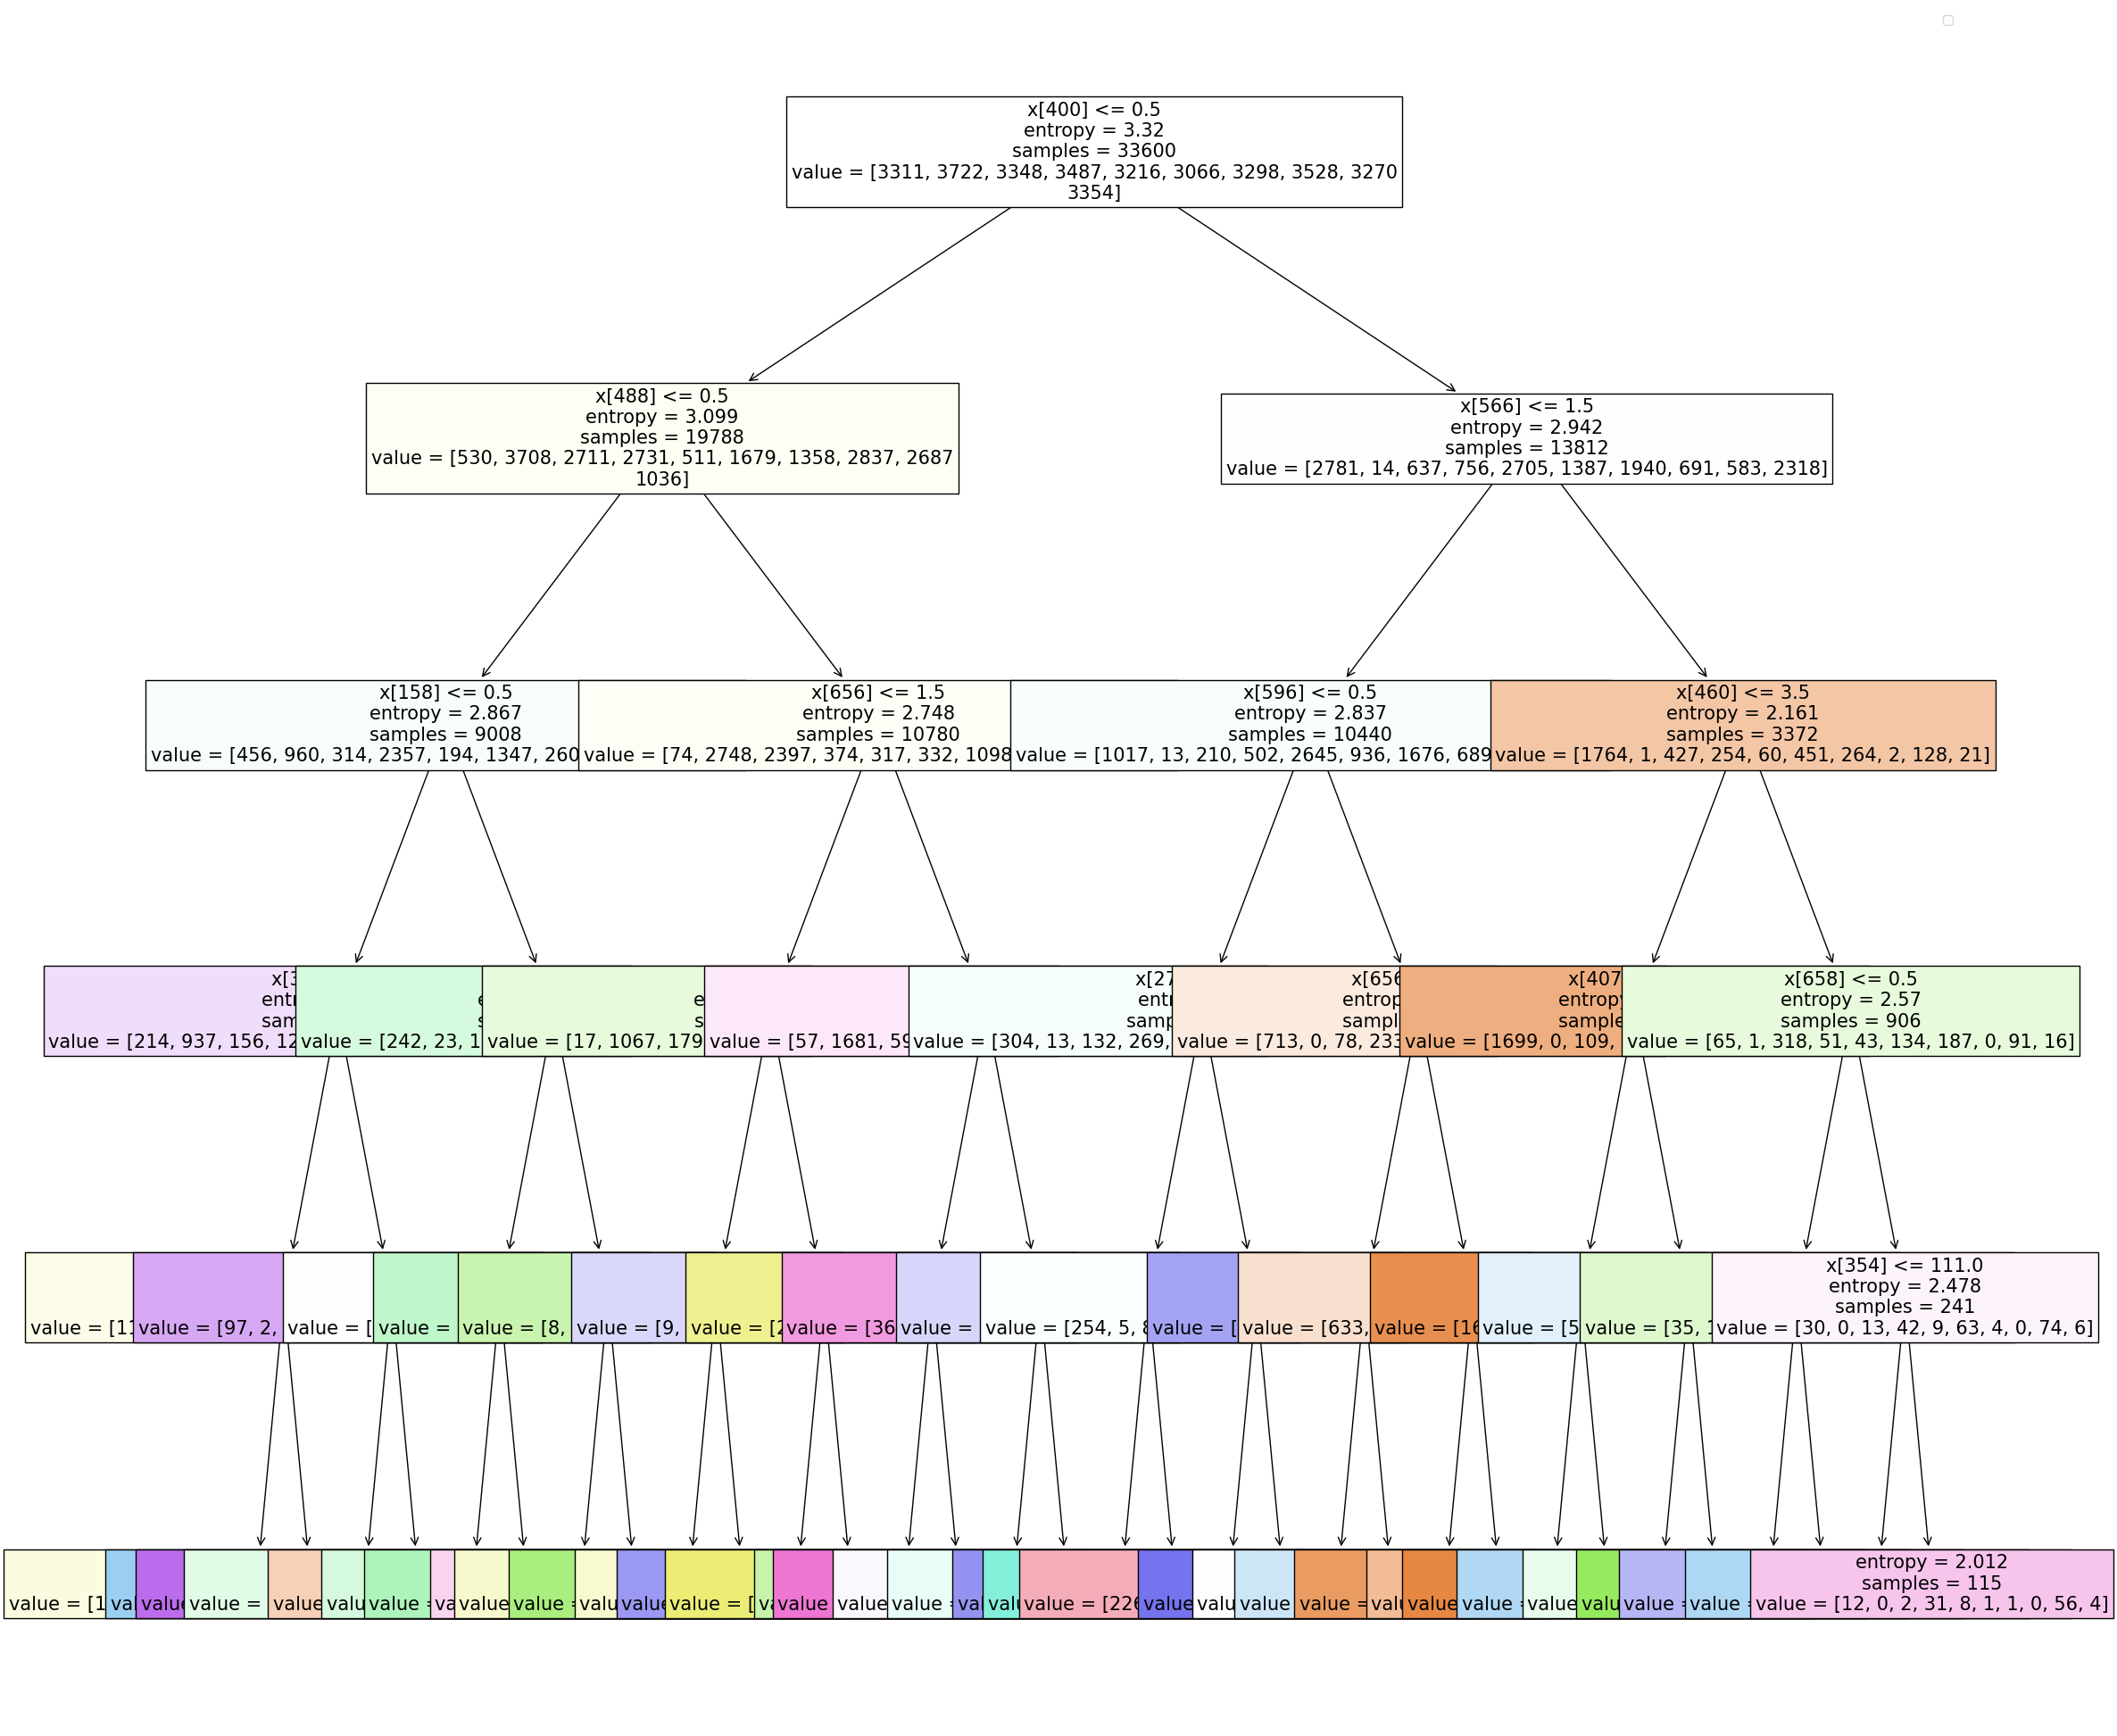

In [ ]:
from sklearn import tree

plt.figure(figsize=(25,25))
tree.plot_tree(treemodel,filled = True , fontsize=15)
plt.legend()



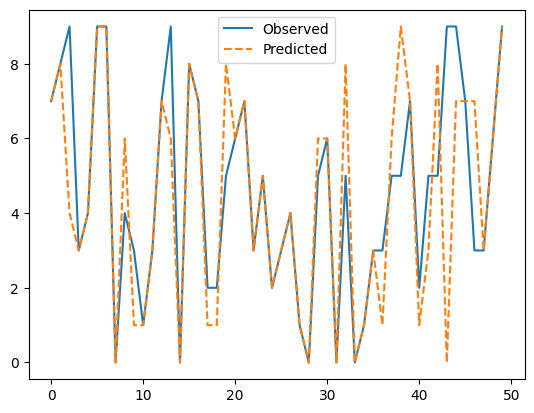

In [ ]:
ax = range(50)
plt.plot(ax,y_test[-50:],label= 'Observed', linestyle= '-')
plt.plot(ax,y_test_pred[-50:],label= 'Predicted', linestyle= '--')

plt.legend()
